In [1]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"
if torch.cuda.is_available():
    DEVICE = "cuda"

print(f"Using device: {DEVICE}")


s:\Stable-Diffusion-Text-To-Image\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


In [2]:
tokenizer = CLIPTokenizer(
    r"S:\Stable-Diffusion-Text-To-Image\data\vocab.json",
    merges_file=r"S:\Stable-Diffusion-Text-To-Image\data\merges.txt"
)


In [3]:
model_file = r"S:\Stable-Diffusion-Text-To-Image\data\v1-5-pruned-emaonly (1).ckpt"
models = model_loader.load_model(model_file, DEVICE)


100%|██████████| 50/50 [33:12<00:00, 39.85s/it]


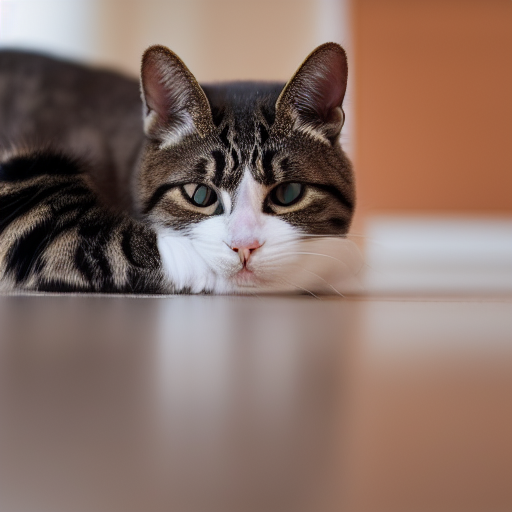

In [ ]:
prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42
strength = 0.9

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=None,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)